# TAT-C: Collect Orbit and Ground Track Example

This example demonstrates how to use direct function calls of the low-level TAT-C library to collect satellite orbit and ground tracks.

First we define the satellites for a mission. In this example we define one satellite (NOAA-20) with a single instrument (Visual/Infrared Imager Radiometer Suite, VIIRS) and an orbit derived from a known two-line element set (TLE). The TLE defines the orbital state at an instant in time which can be used to determine future positions of the satellite. The example TLE below for NOAA-20 was collected from [CelesTrak](https://celestrak.org/) around July 2022.

In [1]:
noaa20_tle = [
    "1 43013U 17073A   22195.78278435  .00000038  00000+0  38919-4 0  9996",
    "2 43013  98.7169 133.9110 0001202  63.8768 296.2532 14.19561306241107",
]

In [2]:
from tatc.schemas import TwoLineElements

noaa20_orbit = TwoLineElements(tle=noaa20_tle)

In [3]:
from tatc import utils

viirs_for = utils.swath_width_to_field_of_regard(834e3, 3000e3)
print(f"computed field of regard: {viirs_for:.1f} degrees")

computed field of regard: 111.6 degrees


In [14]:
from tatc.schemas import Instrument

viirs = Instrument(name="VIIRS", field_of_regard=viirs_for, req_target_sunlit=True)

In [5]:
from tatc.schemas import Satellite

noaa20 = Satellite(name="NOAA 20", orbit=noaa20_orbit, instruments=[viirs])

In [6]:
from datetime import datetime, timedelta, timezone
import pandas as pd

start = datetime(year=2022, month=7, day=14, hour=12, tzinfo=timezone.utc)
end = start + timedelta(hours=2)
delta = timedelta(minutes=2)
times = pd.date_range(start, end, freq=delta)
display(times)

DatetimeIndex(['2022-07-14 12:00:00+00:00', '2022-07-14 12:02:00+00:00',
               '2022-07-14 12:04:00+00:00', '2022-07-14 12:06:00+00:00',
               '2022-07-14 12:08:00+00:00', '2022-07-14 12:10:00+00:00',
               '2022-07-14 12:12:00+00:00', '2022-07-14 12:14:00+00:00',
               '2022-07-14 12:16:00+00:00', '2022-07-14 12:18:00+00:00',
               '2022-07-14 12:20:00+00:00', '2022-07-14 12:22:00+00:00',
               '2022-07-14 12:24:00+00:00', '2022-07-14 12:26:00+00:00',
               '2022-07-14 12:28:00+00:00', '2022-07-14 12:30:00+00:00',
               '2022-07-14 12:32:00+00:00', '2022-07-14 12:34:00+00:00',
               '2022-07-14 12:36:00+00:00', '2022-07-14 12:38:00+00:00',
               '2022-07-14 12:40:00+00:00', '2022-07-14 12:42:00+00:00',
               '2022-07-14 12:44:00+00:00', '2022-07-14 12:46:00+00:00',
               '2022-07-14 12:48:00+00:00', '2022-07-14 12:50:00+00:00',
               '2022-07-14 12:52:00+00:00', '2022-0

In [7]:
from tatc.analysis import collect_orbit_track

results = collect_orbit_track(noaa20, viirs, times)
display(results)

,time,satellite,instrument,swath_width,valid_obs,geometry
0,2022-07-14 12:00:00+00:00,NOAA 20,VIIRS,2.981788e+06,False,POINT Z (21.95309 -4.30943 830100.44549)
1,2022-07-14 12:02:00+00:00,NOAA 20,VIIRS,2.976785e+06,False,POINT Z (20.37549 2.74586 829026.77293)
2,2022-07-14 12:04:00+00:00,NOAA 20,VIIRS,2.974387e+06,False,POINT Z (18.78487 9.80113 828511.60322)
3,2022-07-14 12:06:00+00:00,NOAA 20,VIIRS,2.974522e+06,False,POINT Z (17.14688 16.85117 828540.60607)
4,2022-07-14 12:08:00+00:00,NOAA 20,VIIRS,2.976972e+06,False,POINT Z (15.42110 23.89045 829066.98938)
...,...,...,...,...,...,...
56,2022-07-14 13:52:00+00:00,NOAA 20,VIIRS,2.982751e+06,False,POINT Z (-12.31917 32.67577 830307.18256)
57,2022-07-14 13:54:00+00:00,NOAA 20,VIIRS,2.988980e+06,False,POINT Z (-14.47103 39.66645 831642.23762)
58,2022-07-14 13:56:00+00:00,NOAA 20,VIIRS,2.996045e+06,False,POINT Z (-16.99304 46.61973 833154.32481)
59,2022-07-14 13:58:00+00:00,NOAA 20,VIIRS,3.003364e+06,False,POINT Z (-20.10786 53.51795 834718.65125)


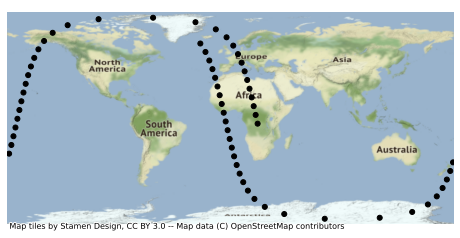

In [8]:
import geoplot as gplt
import contextily as ctx

ax = gplt.pointplot(results, color="k")
ctx.add_basemap(ax, crs=results.crs)

The `collect_ground_track` projects a ground track using knowledge of the instrument. The default setting applies a buffer equivalent to the half swath width to each point in the EPSG:4087 World Equidistant Cylindrical coordinate system.

In [9]:
from tatc.analysis import collect_ground_track
import time

t = time.time()
results = collect_ground_track(noaa20, viirs, times)
print(f"Fast method completed in {time.time() - t:.2f} seconds")
display(results)

Fast method completed in 0.06 seconds


C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


,time,satellite,instrument,swath_width,valid_obs,geometry
0,2022-07-14 12:00:00+00:00,NOAA 20,VIIRS,2.981788e+06,False,"POLYGON ((35.34602 -4.30943, 34.32654 -9.43468..."
1,2022-07-14 12:02:00+00:00,NOAA 20,VIIRS,2.976785e+06,False,"POLYGON ((33.74595 2.74586, 32.72818 -2.37080,..."
2,2022-07-14 12:04:00+00:00,NOAA 20,VIIRS,2.974387e+06,False,"POLYGON ((32.14456 9.80113, 31.12761 4.68860, ..."
3,2022-07-14 12:06:00+00:00,NOAA 20,VIIRS,2.974522e+06,False,"POLYGON ((30.50717 16.85117, 29.49018 11.73841..."
4,2022-07-14 12:08:00+00:00,NOAA 20,VIIRS,2.976972e+06,False,"POLYGON ((28.79240 23.89045, 27.77457 18.77348..."
...,...,...,...,...,...,...
56,2022-07-14 13:52:00+00:00,NOAA 20,VIIRS,2.982751e+06,False,"POLYGON ((1.07808 32.67577, 0.05828 27.54886, ..."
57,2022-07-14 13:54:00+00:00,NOAA 20,VIIRS,2.988980e+06,False,"POLYGON ((-1.04580 39.66645, -2.06773 34.52884..."
58,2022-07-14 13:56:00+00:00,NOAA 20,VIIRS,2.996045e+06,False,"POLYGON ((-3.53607 46.61973, -4.56042 41.46997..."
59,2022-07-14 13:58:00+00:00,NOAA 20,VIIRS,3.003364e+06,False,"POLYGON ((-6.61802 53.51795, -7.64488 48.35561..."


While fast, the EPSG:4087 coordinate reference frame is not accurate near the poles, as seen in the polyplot below.

C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


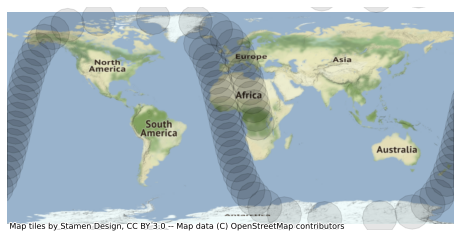

In [10]:
import geoplot as gplt
import contextily as ctx

ax = gplt.polyplot(results, facecolor="k", alpha=0.1, zorder=1)
ctx.add_basemap(ax, crs=results.crs)

The results can also be dissolved to merge adjacent polygons.

C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


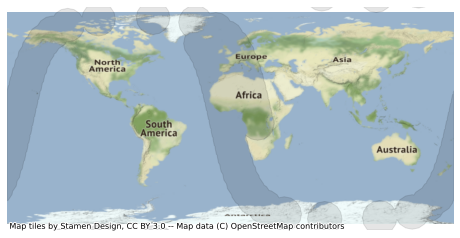

In [11]:
import geoplot as gplt
import contextily as ctx

ax = gplt.polyplot(results.dissolve(), facecolor="k", alpha=0.1, zorder=1)
ctx.add_basemap(ax, crs=results.crs)

Optionally, the `collect_ground_track` function can be called using the `fast=False` argument to compute the projections in more accurate UTM zones.

C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


UTM method completed in 3.48 seconds


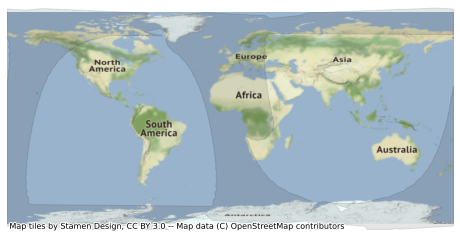

In [12]:
from tatc.analysis import collect_ground_track
import time

t = time.time()
results = collect_ground_track(noaa20, viirs, times, crs="utm")
print(f"UTM method completed in {time.time() - t:.2f} seconds")


import geoplot as gplt
import contextily as ctx

ax = gplt.polyplot(results.dissolve(), facecolor="k", alpha=0.1, zorder=1)
ctx.add_basemap(ax, crs=results.crs)

C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\pandas\core\dtypes\cast.py:1983: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\numpy\lib\shape_base.py:769: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Ntotal = len(ary)
C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\sit

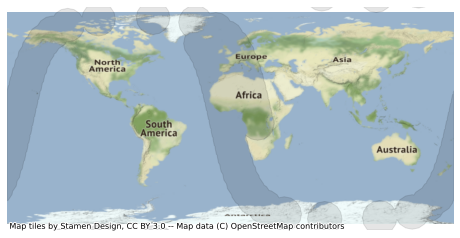

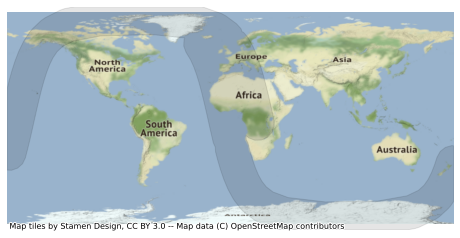

In [15]:
from tatc.analysis import compute_ground_track

import geoplot as gplt
import contextily as ctx

ax = gplt.polyplot(
    compute_ground_track(noaa20, viirs, times, method="point"),
    facecolor="k",
    alpha=0.1,
    zorder=1,
)
ctx.add_basemap(ax, crs=results.crs)

ax = gplt.polyplot(
    compute_ground_track(noaa20, viirs, times, method="line"),
    facecolor="k",
    alpha=0.1,
    zorder=1,
)
ctx.add_basemap(ax, crs=results.crs)